# ECG-based PUF

### 3.2 Data Pre Processing
Load the entire dataset and assign to variable ```dict_all_records```.

In [4]:
import numpy as np
import wfdb
db_name = "ecgiddb/"
dict_all_records = dict()
f = open(db_name + "RECORDS", "r")
for y in f.readlines():
    person = y.split("/")[0].strip()
    record = y.split("/")[1].strip()
    # The record cannot be duplicate, so we can safely insert it everytime, w/o checking
    if person not in dict_all_records:
        dict_all_records[person] = {record: wfdb.rdrecord(db_name + person + "/" + record, sampfrom=0, channels=[0])}
    else:
        dict_all_records[person].update({record: wfdb.rdrecord(db_name + person + "/" + record, sampfrom=0, channels=[0])})

Detect QRS Complex on each signal in order to apply splitting and then proceed with filtering

In [11]:
from wfdb import processing
dict_all_peaks = dict()
for person in dict_all_records:
    dict_all_peaks[person] = dict()
    for record in dict_all_records[person]:
        signal_detected = dict_all_records[person][record]
        qrs_inds = processing.qrs.gqrs_detect(sig=signal_detected.p_signal[:,0], fs=signal_detected.fs)
        if len(qrs_inds) < 1:
            continue
        # Correct the peaks shifting them to local maxima
        min_bpm = 20
        max_bpm = 230
        # min_gap = record.fs * 60 / min_bpm
        # Use the maximum possible bpm as the search radius
        search_radius = int(signal_detected.fs * 60 / max_bpm)
        corrected_peak_inds = processing.peaks.correct_peaks(signal_detected.p_signal[:,0], peak_inds=qrs_inds, search_radius=search_radius, smooth_window_size=150)
        dict_all_peaks[person][record] = sorted(corrected_peak_inds)

In [28]:
splitted_signal = dict()
for person in dict_all_peaks:
    splitted_signal[person] = dict()
    for corrected_peak_inds in dict_all_peaks[person]:
        splitted_signal[person][corrected_peak_inds] = list()
        for r in dict_all_peaks[person][corrected_peak_inds]:
            if r<150 or r>9800:
                continue
            # Get from the original signal, at this point we can apply the noise removal algorithm
            current_seq = dict_all_records[person][corrected_peak_inds].p_signal[r-80:r+80].tolist()
            splitted_signal[person][corrected_peak_inds].append(current_seq)

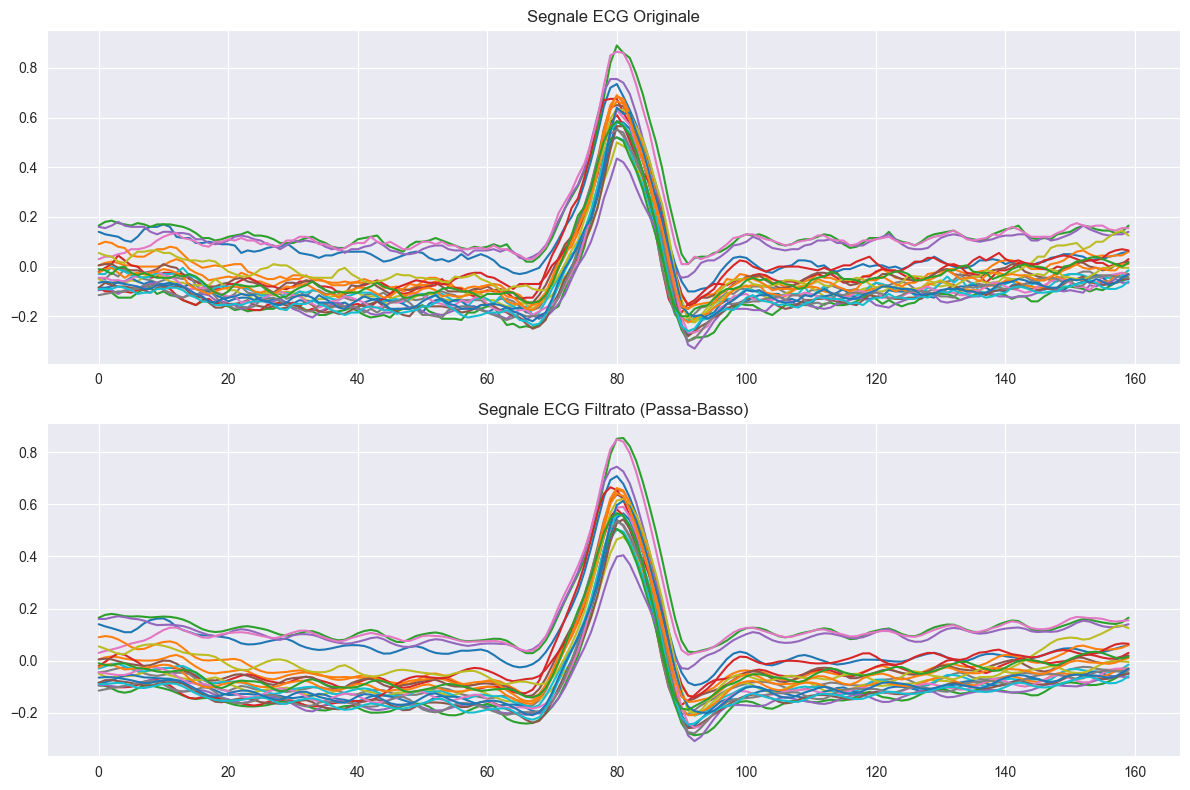

In [39]:
import matplotlib.pyplot as plt
from functools import reduce
test = splitted_signal['Person_01k']['rec_1']
#test = reduce(lambda x,z: x+z, test)

from scipy import signal
cutoff_frequency = 20
order = 1
sampling_rate = 100
b, a = signal.butter(order, cutoff_frequency / (sampling_rate / 2), btype='low')
toprint_filtered = list()
for y in test:
    current_sign = list()
    for z in y:
        current_sign.append(z[0])
    test_filtered = signal.filtfilt(b, a, current_sign)
    toprint_filtered.append(test_filtered)

r = plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)

for y in test:
    plt.plot(y)
plt.title('Segnale ECG Originale')
plt.grid(True)

plt.subplot(2, 1, 2)
for y in toprint_filtered:
    plt.plot(y)
plt.title('Segnale ECG Filtrato (Passa-Basso)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
for y in toprint_filtered:
    plt.plot(y)
from sympy import fwht
sequences = c(sequences.ravel().tolist())
sequences = np.array(sequences)

Optional: print one sample to show the difference between base signal and filtered signal.

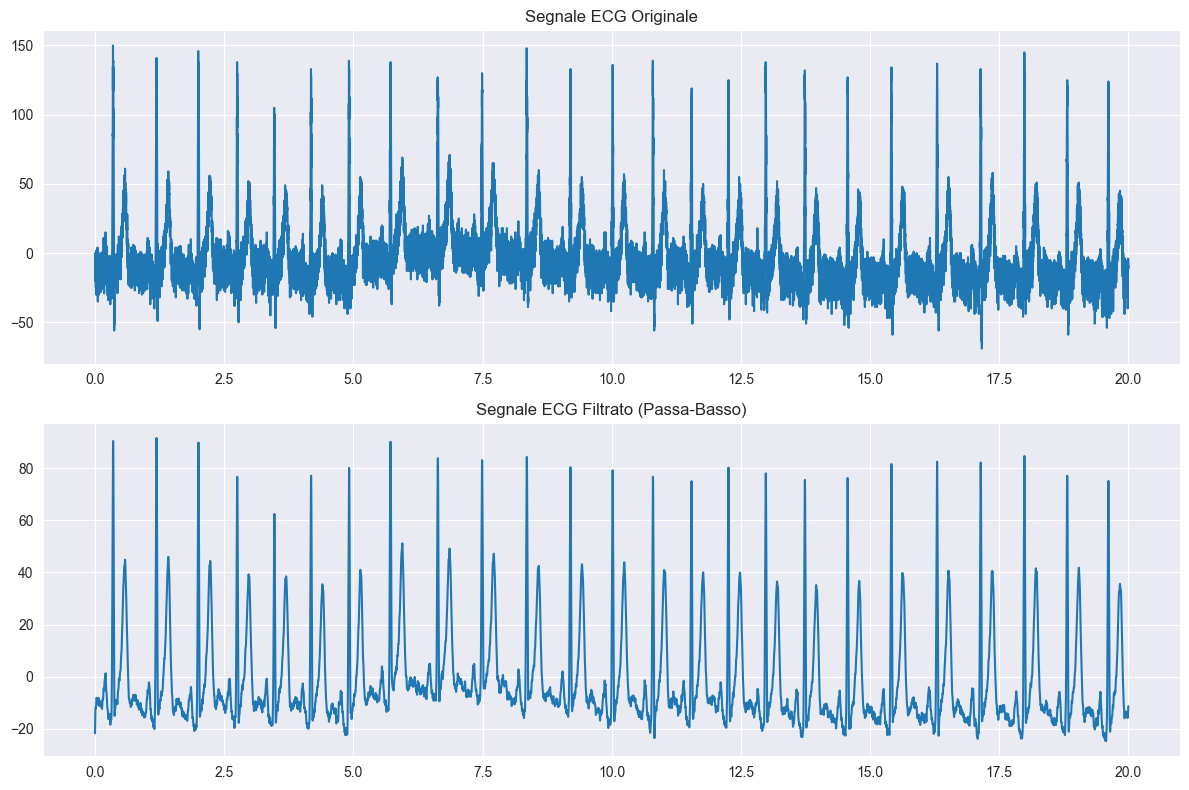

In [10]:
import matplotlib.pyplot as plt

duration = 20
time_axis = np.arange(0, duration, 1 / sampling_rate)
r = plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(time_axis, dict_all_records['Person_01']['rec_2'])
plt.title('Segnale ECG Originale')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time_axis, dict_all_records_filtered['Person_01']['rec_2'])
plt.title('Segnale ECG Filtrato (Passa-Basso)')
plt.grid(True)

plt.tight_layout()
plt.show()

### 3.3 Feature Extraction

In this phase, we get the Filtered ECG and split the signal into single peaks.

In [15]:
from wfdb import processing
import wfdb

for person in dict_all_records_filtered:
    for record in dict_all_records_filtered[person]:
        try:
            current_record = wfdb.rdrecord(dict_all_records_filtered[person][record])
        except:
            print(person, record)


Person_01 rec_1
Person_01 rec_2
Person_01 rec_3
Person_01 rec_4
Person_01 rec_5
Person_01 rec_6
Person_01 rec_7
Person_01 rec_8
Person_01 rec_9
Person_01 rec_10
Person_01 rec_11
Person_01 rec_12
Person_01 rec_13
Person_01 rec_14
Person_01 rec_15
Person_01 rec_16
Person_01 rec_17
Person_01 rec_18
Person_01 rec_19
Person_01 rec_20
Person_02 rec_1
Person_02 rec_2
Person_02 rec_3
Person_02 rec_4
Person_02 rec_5
Person_02 rec_6
Person_02 rec_7
Person_02 rec_8
Person_02 rec_9
Person_02 rec_10
Person_02 rec_11
Person_02 rec_12
Person_02 rec_13
Person_02 rec_14
Person_02 rec_15
Person_02 rec_16
Person_02 rec_17
Person_02 rec_18
Person_02 rec_19
Person_02 rec_20
Person_02 rec_21
Person_02 rec_22
Person_03 rec_1
Person_03 rec_2
Person_03 rec_3
Person_03 rec_4
Person_03 rec_5
Person_04 rec_1
Person_04 rec_2
Person_05 rec_1
Person_05 rec_2
Person_06 rec_1
Person_06 rec_2
Person_07 rec_1
Person_07 rec_2
Person_08 rec_1
Person_08 rec_2
Person_09 rec_1
Person_09 rec_2
Person_09 rec_3
Person_09 rec_4
